<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [93]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [94]:
student_counts = df_exam_scores['Method'].value_counts().sort_index()
print(student_counts)

Method
A    17
B    17
C    16
Name: count, dtype: int64


Compute the mean and standard deviation of exam scores for each group.

In [95]:
group_stats = df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])
print(group_stats)

             mean       std
Method                     
A       78.588235  2.575336
B       86.294118  2.365500
C       71.937500  1.768945


Use a plot to show the exam scores by teaching method.

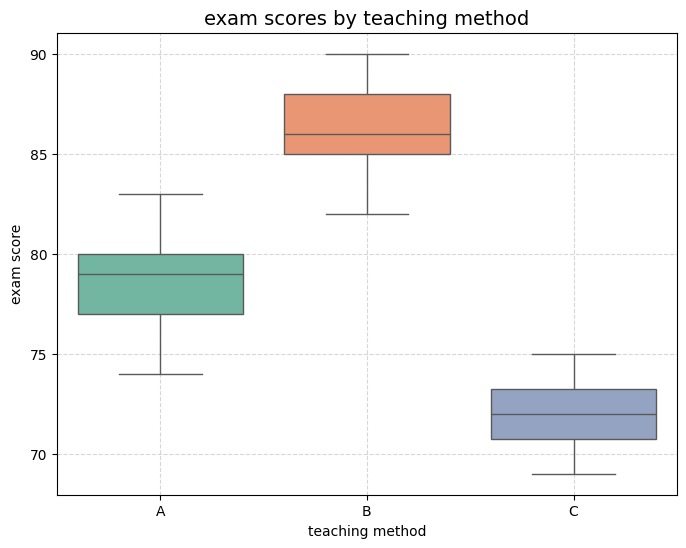

In [96]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Method', y='Score', data=df_exam_scores, hue='Method', palette='Set2', legend=False)

plt.title('exam scores by teaching method', fontsize=14)
plt.xlabel('teaching method')
plt.ylabel('exam score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [97]:
# isolate the exam scores for each specific teaching method into separate variables
group_a = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
group_b = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
group_c = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

# perform the one-way anova test to compare the means of the three groups
f_stat, p_value = stats.f_oneway(group_a, group_b, group_c)

print(f"f-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# determine if the result is significant at alpha = 0.05
if p_value < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

f-statistic: 165.1785
p-value: 0.0000
reject null hypothesis


Interpret the results. What does it say about the relationship between teaching method and exam scores?

- if p-value < 0.05, there is a significant difference in mean scores between the groups.
- based on the boxplot/means, method b likely has the highest performance.

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [98]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [99]:
# count the frequency of each gender in the dataset
print("gender counts:")
print(df_littering_data['Gender'].value_counts())

# count the frequency of yes/no responses for littering
print("\nlitter counts:")
print(df_littering_data['Litter'].value_counts())

gender counts:
Gender
Male      20
Female    20
Name: count, dtype: int64

litter counts:
Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [100]:
contingency_table = pd.crosstab(
    df_littering_data['Gender'],
    df_littering_data['Litter'],
    margins=True
)

print(contingency_table)

Litter  No  Yes  All
Gender              
Female  14    6   20
Male     8   12   20
All     22   18   40


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

- null hypothesis (h0): gender and littering behavior are independent.
- alternative hypothesis (h1): gender and littering behavior are associated.

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [101]:
# create a contingency table without margins for the statistical test
observed = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'])

# calculate the chi-squared statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(observed)

print(f"chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"degrees of freedom: {dof}")

# check statistical significance at alpha = 0.05
if p < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

chi-squared statistic: 2.5253
p-value: 0.1120
degrees of freedom: 1
fail to reject null hypothesis


Interpret your results. Is there evidence that gender and littering behavior are associated?

- compare p-value to 0.05.
- if p < 0.05, it suggests gender affects littering behavior.
- if p >= 0.05, there is no evidence of an association between gender and littering.